# **Analyser les données de ma montre connectée**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

**Récupération des Données**

Connexion à google drive pour impoter mes données


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/DATATRAIN

 20250306_1806064898_MiFitness_hlth_center_fitness_data.csv   train.csv
'data minning.gdoc'


In [ ]:
chemin_fichier = "/content/drive/MyDrive/DATATRAIN/20250306_1806064898_MiFitness_hlth_center_fitness_data.csv"

In [ ]:
df = pd.read_csv(chemin_fichier, delimiter=",") # Charger le CSV dans un DataFrame

In [ ]:
df.head()

,Uid,Sid,Key,Time,Value,UpdateTime
0,1806064898,739154794,heart_rate,1741186500,"{""time"":1741186500,""bpm"":94}",1741188370
1,1806064898,739154794,heart_rate,1741186440,"{""time"":1741186440,""bpm"":91}",1741188370
2,1806064898,739154794,heart_rate,1741186380,"{""time"":1741186380,""bpm"":66}",1741188370
3,1806064898,739154794,heart_rate,1741186320,"{""time"":1741186320,""bpm"":75}",1741188370
4,1806064898,739154794,heart_rate,1741186260,"{""time"":1741186260,""bpm"":65}",1741188370


In [ ]:
# Affiche un résumé concis du DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151850 entries, 0 to 151849
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Uid         151850 non-null  int64 
 1   Sid         151850 non-null  object
 2   Key         151850 non-null  object
 3   Time        151850 non-null  int64 
 4   Value       151850 non-null  object
 5   UpdateTime  151850 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 7.0+ MB


In [ ]:
# Filtre les lignes du DataFrame où la colonne 'Key' est égale à 'heart_rate',
# afin de créer un sous-ensemble contenant uniquement les données de fréquence cardiaque.
df_heart_rate = df[df['Key'] == 'heart_rate']

In [ ]:
# Affiche les 5 premières lignes du DataFrame
df.head()

,Uid,Sid,Key,Time,Value,UpdateTime
0,1806064898,739154794,heart_rate,1741186500,"{""time"":1741186500,""bpm"":94}",1741188370
1,1806064898,739154794,heart_rate,1741186440,"{""time"":1741186440,""bpm"":91}",1741188370
2,1806064898,739154794,heart_rate,1741186380,"{""time"":1741186380,""bpm"":66}",1741188370
3,1806064898,739154794,heart_rate,1741186320,"{""time"":1741186320,""bpm"":75}",1741188370
4,1806064898,739154794,heart_rate,1741186260,"{""time"":1741186260,""bpm"":65}",1741188370


**Préparation et Nettoyage des Données**

In [ ]:
# Extrait la valeur de la fréquence cardiaque ('bpm') depuis la colonne 'Value' et la stocke dans une nouvelle colonne.
df_heart_rate['bpm'] = df_heart_rate['Value'].apply(lambda x: json.loads(x)['bpm'])

# Extrait l’horodatage ('time') depuis la colonne 'Value' et le stocke dans une nouvelle colonne.
df_heart_rate['time'] = df_heart_rate['Value'].apply(lambda x: json.loads(x)['time'])


/tmp/ipython-input-11-3658402502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_rate['bpm'] = df_heart_rate['Value'].apply(lambda x: json.loads(x)['bpm'])
/tmp/ipython-input-11-3658402502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_rate['time'] = df_heart_rate['Value'].apply(lambda x: json.loads(x)['time'])


In [ ]:
# Supprime les colonnes inutiles du DataFrame pour ne garder que les données pertinentes.
df_heart_rate = df_heart_rate.drop(columns=['Uid', 'Sid', 'Value', 'UpdateTime', 'Time'])



In [ ]:
df_heart_rate.head()

,Key,bpm,time
0,heart_rate,94,1741186500
1,heart_rate,91,1741186440
2,heart_rate,66,1741186380
3,heart_rate,75,1741186320
4,heart_rate,65,1741186260


In [ ]:
# Convertir 'Time' et 'UpdateTime' en format date
df_heart_rate['time'] = pd.to_datetime(df_heart_rate['time'], unit='s')


In [ ]:
# 7. Tri des données par ordre chronologique si nécessaire
df_heart_rate = df_heart_rate.sort_values(by='time')

In [ ]:
df_heart_rate.head()

,Key,bpm,time
151844,heart_rate,88,2024-11-30 14:27:00
151837,heart_rate,85,2024-11-30 14:31:00
151834,heart_rate,78,2024-11-30 14:37:00
151822,heart_rate,87,2024-11-30 14:58:00
151813,heart_rate,71,2024-11-30 15:07:00


In [ ]:
df_heart_rate.isnull().sum() # Affiche les valeurs manquantes

,0
Key,0
bpm,0
time,0


In [ ]:
df_heart_rate.describe()

,bpm,time
count,71525.000000,71525
mean,76.647829,2025-01-17 11:17:24.310380800
min,31.000000,2024-11-30 14:27:00
25%,64.000000,2024-12-24 14:49:00
50%,76.000000,2025-01-07 23:35:00
75%,87.000000,2025-02-19 08:32:00
max,174.000000,2025-03-05 14:55:00
std,15.162154,NaN


In [ ]:
# 4. Création d'une colonne 'date' pour les regroupements journaliers
df_heart_rate['date'] = df_heart_rate['time'].dt.date

In [ ]:
# 5. Calcul de la fréquence cardiaque moyenne par jour
daily_avg = df_heart_rate.groupby('date')['bpm'].mean().reset_index()
daily_avg.columns = ['date', 'avg_bpm']

In [ ]:
# 6. Calcul de la fréquence cardiaque au repos (FCR)
# Hypothèse : on considère la FCR comme la valeur minimale quotidienne (ou globale)
daily_min = df_heart_rate.groupby('date')['bpm'].min().reset_index()
daily_min.columns = ['date', 'resting_bpm']
fcr_global = df_heart_rate['bpm'].min()

In [ ]:
# 10. Affichage des indicateurs
print("🔍 Indicateurs clés :")
print(f"- Fréquence cardiaque au repos (valeur minimale globale) : {fcr_global} BPM")
print(f"- Moyenne journalière (sur {len(daily_avg)} jours) :\n")
daily_avg

🔍 Indicateurs clés :
- Fréquence cardiaque au repos (valeur minimale globale) : 31 BPM
- Moyenne journalière (sur 96 jours) :



,date,avg_bpm
0,2024-11-30,83.381818
1,2024-12-01,97.930556
2,2024-12-02,81.969697
3,2024-12-03,75.029630
4,2024-12-04,80.431953
...,...,...
91,2025-03-01,72.547519
92,2025-03-02,67.294985
93,2025-03-03,77.075789
94,2025-03-04,75.771169


In [ ]:
import seaborn as sns

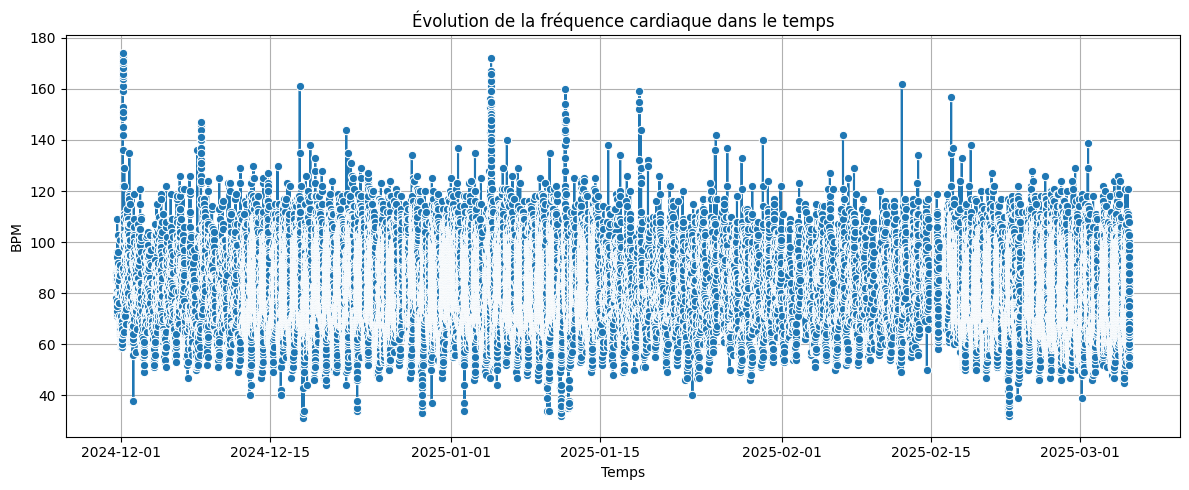

In [ ]:
# 7. 📈 Visualisation 1 : Évolution de la fréquence cardiaque dans le temps (point par point)
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_heart_rate, x='time', y='bpm', marker='o')
plt.title("Évolution de la fréquence cardiaque dans le temps")
plt.xlabel("Temps")
plt.ylabel("BPM")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-35-3219954685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_avg, x='date', y='avg_bpm', palette='coolwarm')


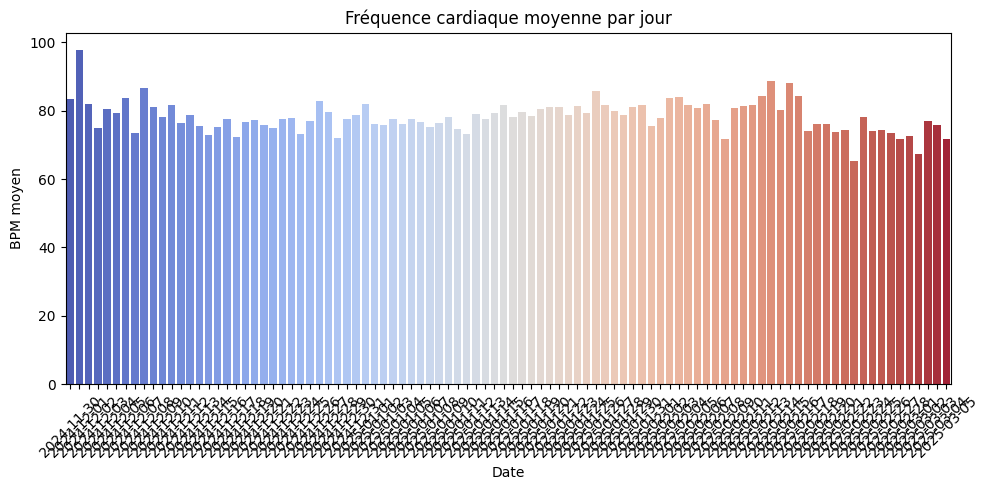

In [ ]:
# 8. 📈 Visualisation 2 : Moyenne journalière
plt.figure(figsize=(10, 5))
sns.barplot(data=daily_avg, x='date', y='avg_bpm', palette='coolwarm')
plt.title("Fréquence cardiaque moyenne par jour")
plt.xlabel("Date")
plt.ylabel("BPM moyen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

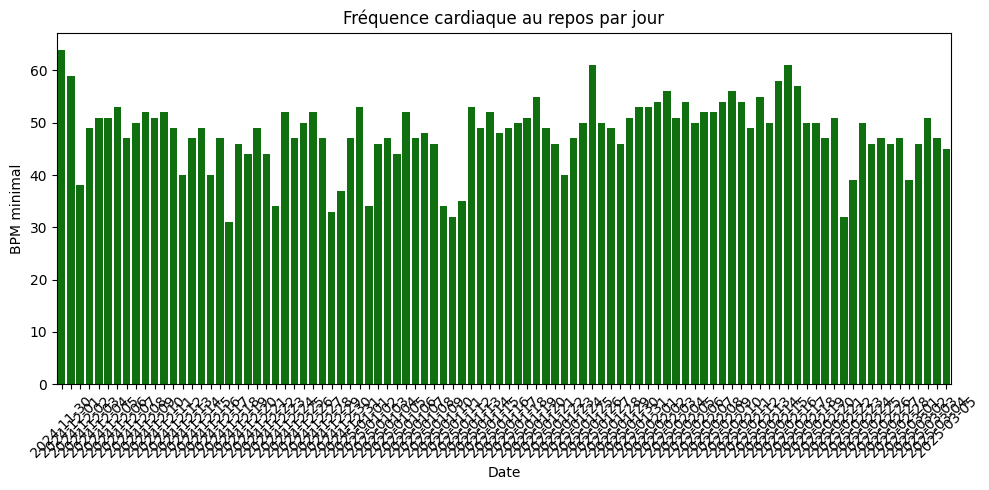

In [ ]:
# 9. 📈 Visualisation 3 : Fréquence cardiaque au repos par jour
plt.figure(figsize=(10, 5))
sns.barplot(data=daily_min, x='date', y='resting_bpm', color='green')
plt.title("Fréquence cardiaque au repos par jour")
plt.xlabel("Date")
plt.ylabel("BPM minimal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Seuil pour définir un pic d’activité (modifiable selon ton cas)
seuil_pic = 120

# Détection des pics : valeurs où le bpm dépasse le seuil
df_heart_rate['is_peak'] = df_heart_rate['bpm'] > seuil_pic

# Affichage des pics détectés
peaks = df_heart_rate[df_heart_rate['is_peak']]

print("📈 Pics d'activité détectés :")
print(peaks[['time', 'bpm']])

📈 Pics d'activité détectés :
                      time  bpm
151236 2024-12-01 04:25:00  122
151233 2024-12-01 04:26:00  136
151230 2024-12-01 04:27:00  142
151228 2024-12-01 04:28:00  145
151222 2024-12-01 04:29:00  149
...                    ...  ...
3262   2025-03-04 05:02:00  124
2508   2025-03-04 13:04:00  126
2077   2025-03-04 17:19:00  124
929    2025-03-05 05:11:00  121
364    2025-03-05 10:49:00  121

[279 rows x 2 columns]


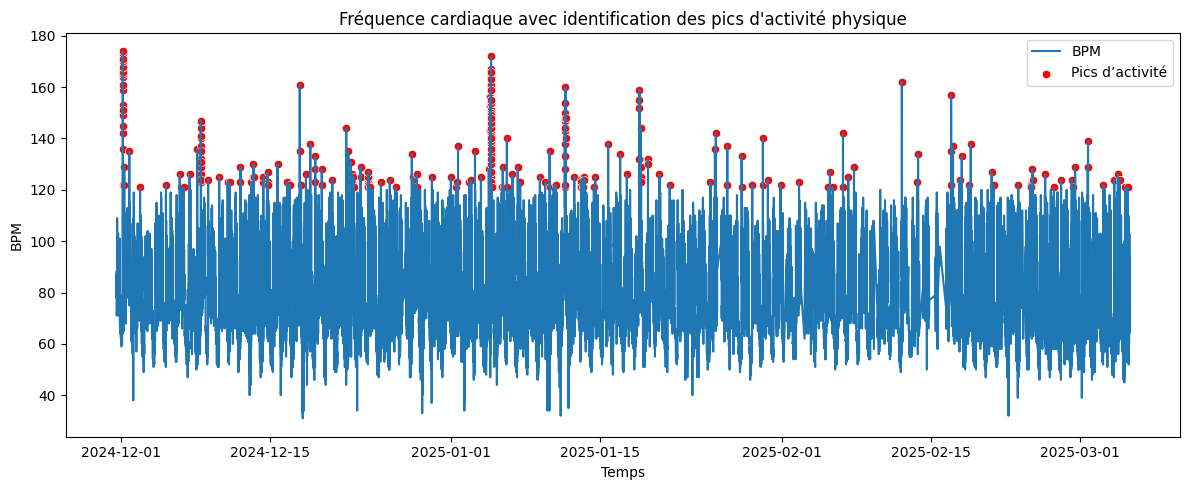

In [ ]:
# Visualisation avec les pics mis en évidence
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_heart_rate, x='time', y='bpm', label='BPM')
sns.scatterplot(data=peaks, x='time', y='bpm', color='red', label='Pics d’activité')
plt.title("Fréquence cardiaque avec identification des pics d'activité physique")
plt.xlabel("Temps")
plt.ylabel("BPM")
plt.legend()
plt.tight_layout()
plt.show()

**Corrélation entre Fréquence Cardiaque et Stress**

In [ ]:
df_stress = df[df['Key'] == 'stress']

In [ ]:
df_stress.head()

,Uid,Sid,Key,Time,Value,UpdateTime
37,1806064898,739154794,stress,1741184700,"{""time"":1741184700,""stress"":37}",1741184777
108,1806064898,739154794,stress,1741182000,"{""time"":1741182000,""stress"":37}",1741184777
138,1806064898,739154794,stress,1741181100,"{""time"":1741181100,""stress"":38}",1741184777
142,1806064898,739154794,stress,1741180800,"{""time"":1741180800,""stress"":18}",1741184777
149,1806064898,739154794,stress,1741180500,"{""time"":1741180500,""stress"":16}",1741184777
